# Module 6 Peer Review Assignment

# Problem 1

Suppose $X$ and $Y$ are independent normal random variables with the same mean $\mu$ and the same variance $\sigma^2$. Do the random variables $W = X + Y$ and $U=2X$ have the same distribution? Explain.

No. 

$E[W] = E[X] + E[Y] = 2\mu$ 

$Var(W) = Var(X) + Var(Y) = \sigma^2 + \sigma^2 = 2\sigma^2$ 

therefore, $W \sim N(2\mu, 2\sigma^2)$.

---

$E[U]=E[2X] = 2E[X] = 2\mu$

$Var(U) = Var(2X) = 2^2Var(X) = 4\sigma^2$

therefore,$U \sim N(2\mu, 4\sigma^2)$.


Therefore, we can conclude that they do not have the same distribution.

# Problem 2: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$?

YOUR ANSWER HERE

The expected value of a uniform distribution with bounds [a, b] is (a + b) / 2, which gives an expected value of 50 for a uniform distribution with bounds [0, 100]. The variance of a uniform distribution with bounds [a, b] is ((b - a)^2) / 12, which gives a variance of approximately 833.33 for a uniform distribution with bounds [0, 100].

----
$$E[X] = 50$$

$$ Var(X)  \approx 833.33 $$

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [11]:
uniform.sample.mean = function(n){
    
    samples = runif(n, 0, 100)
    sample.mean = mean(samples)
    return(sample.mean)
}

uniform.sample.mean(10)

[1] 35.91997

In [3]:
uniform.sample.mean(100)

[1] 52.75944

In [4]:
uniform.sample.mean(1000)

[1] 49.87278

In [5]:
uniform.sample.mean(100000)

[1] 50.10391

we can see as we increase n the sample mean is more accurate

**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

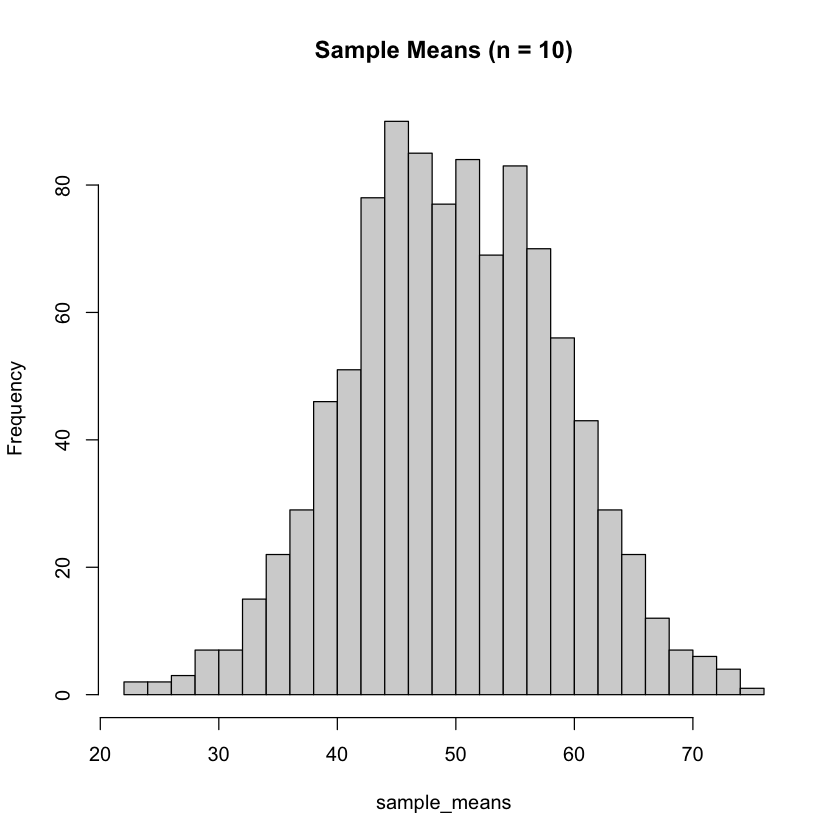

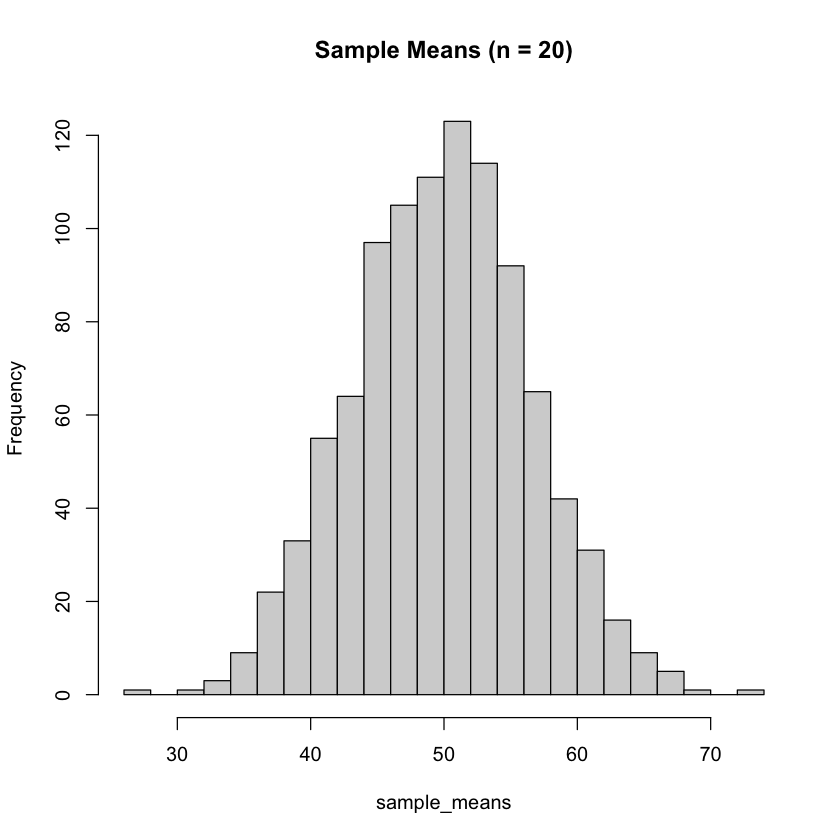

In [12]:
uniform.sample.mean <- function(n){
  x <- runif(n, 0, 100)
  mean(x)
}

set.seed(123) # for reproducibility

# for n = 10
m <- 1000
n <- 10
sample_means <- replicate(m, uniform.sample.mean(n))
hist(sample_means, breaks = 30, main = paste0("Sample Means (n = ", n, ")"))

# for n = 20
n <- 20
sample_means <- replicate(m, uniform.sample.mean(n))
hist(sample_means, breaks = 30, main = paste0("Sample Means (n = ", n, ")"))



We can see that as we increase the sample size, the distribution of sample means becomes narrower and taller, and approaches a normal distribution. This is an instance of the Central Limit Theorem, which states that for large sample sizes, the sample mean of any distribution (regardless of its shape) approaches a normal distribution.

The mean of the sample distribution is equal to the population mean, which in this case is 50 (since we are sampling from a uniform distribution between 0 and 100). The variance of the sample distribution is equal to the population variance divided by the sample size, which in this case is:

Var(X) = (100 - 0)^2 / 12 = 833.33

Var(X-bar) = Var(X) / n = 83.33 / n

So the variance of the sample distribution decreases as the sample size increases.

**d)** Recall that our underlying population distribution is $U(0, 100)$. Try changing the underlying distribution (For example a binomial(10, 0.5)) and check the sample distribution. Be sure to explain what you notice.

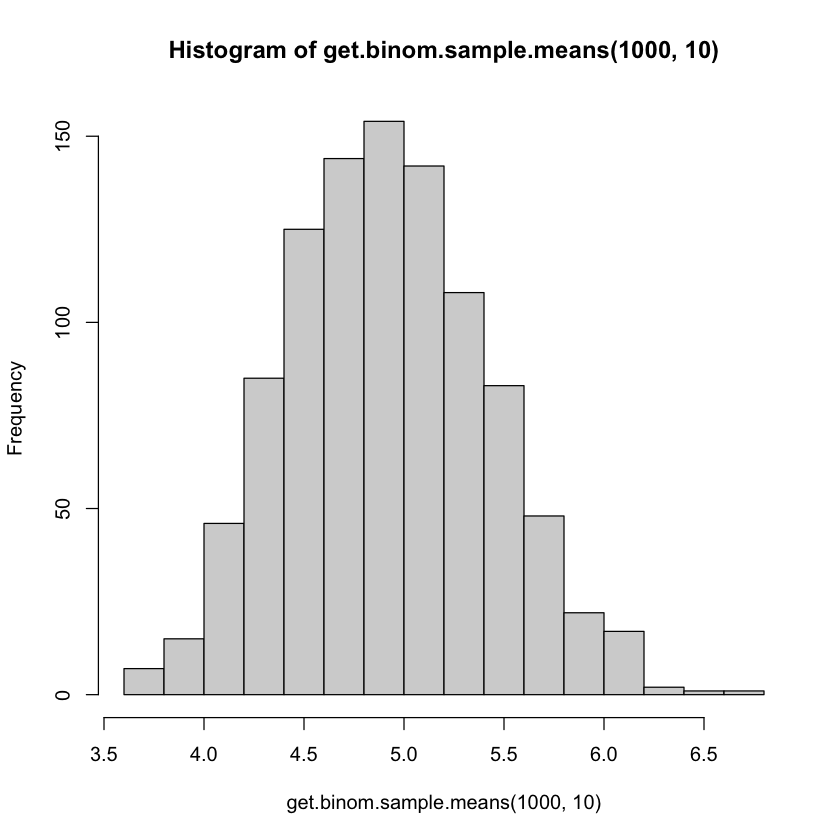

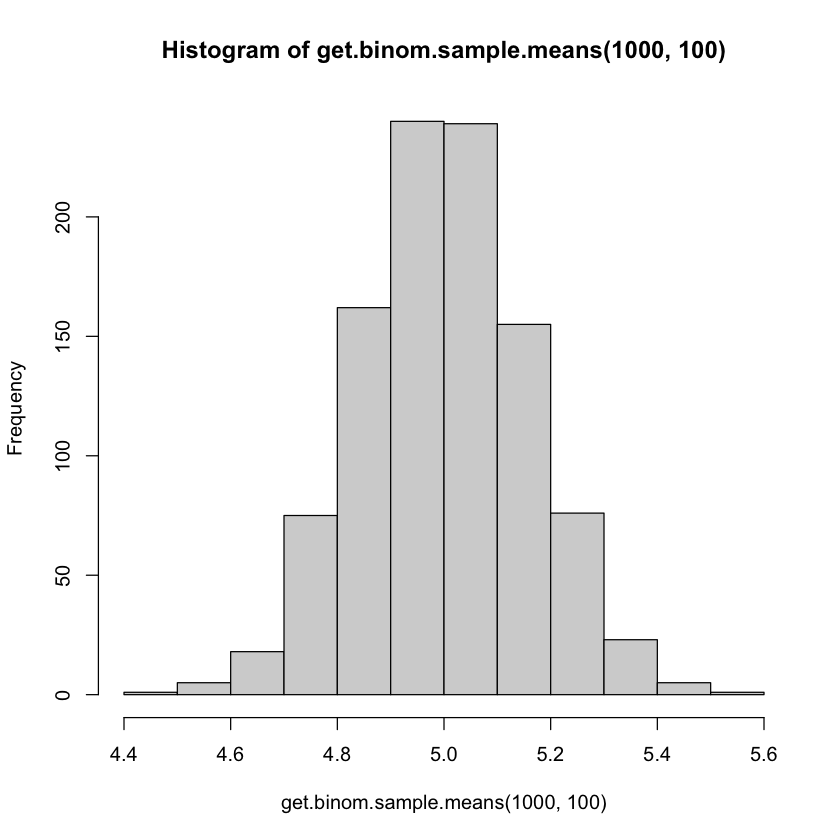

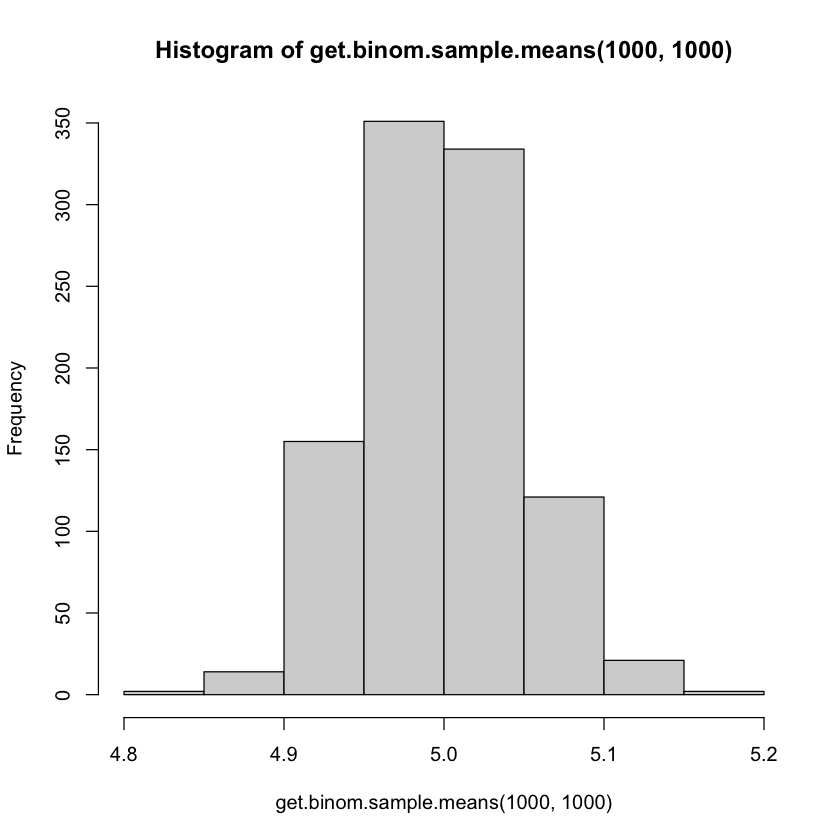

In [13]:
binomial.sample.mean <- function(n){
  samples <- rbinom(n, 10, 0.5)
  sample.mean <- mean(samples)
  return(sample.mean)
}

get.binom.sample.means <- function(m, n){
  means <- numeric(m)
  for (i in 1:m){
    means[i] <- binomial.sample.mean(n)
  }
  return(means)
}

hist(get.binom.sample.means(1000, 10))
hist(get.binom.sample.means(1000, 100))
hist(get.binom.sample.means(1000, 1000))


The sample distribution and the uniform sample distribution are similar. and the 3 properties from before still hold. 

# Problem 3

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$.

Based on the Central Limit Theorem, when 𝑋 follows a discrete uniform distribution such as unif{1,𝑑}, then the mean of 𝑛 independent and identically distributed (i.i.d) samples, 𝑋¯𝑛, follows a normal distribution with mean 𝐸[𝑋¯𝑛] = 𝐸[𝑋] and variance 𝑉𝑎𝑟[𝑋¯𝑛] = 𝑉𝑎𝑟[𝑋] / 𝑛.

For the case when 𝑑 = 6, the mean and variance of 𝑋 are:

𝐸[𝑋] = (1 + 6) / 2 = 3.5
𝑉𝑎𝑟[𝑋] = (6 - 1 + 1)^2 / 12 = 2.92

Therefore, the mean and variance of 𝑋¯𝑛 are:

𝐸[𝑋¯𝑛] = 𝐸[𝑋] = 3.5
𝑉𝑎𝑟[𝑋¯𝑛] = 𝑉𝑎𝑟[𝑋] / 𝑛 = 2.92 / 𝑛

So, when 𝑑=6, the distribution of 𝑋¯𝑛 follows a normal distribution with mean 3.5 and variance 2.92/𝑛.

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

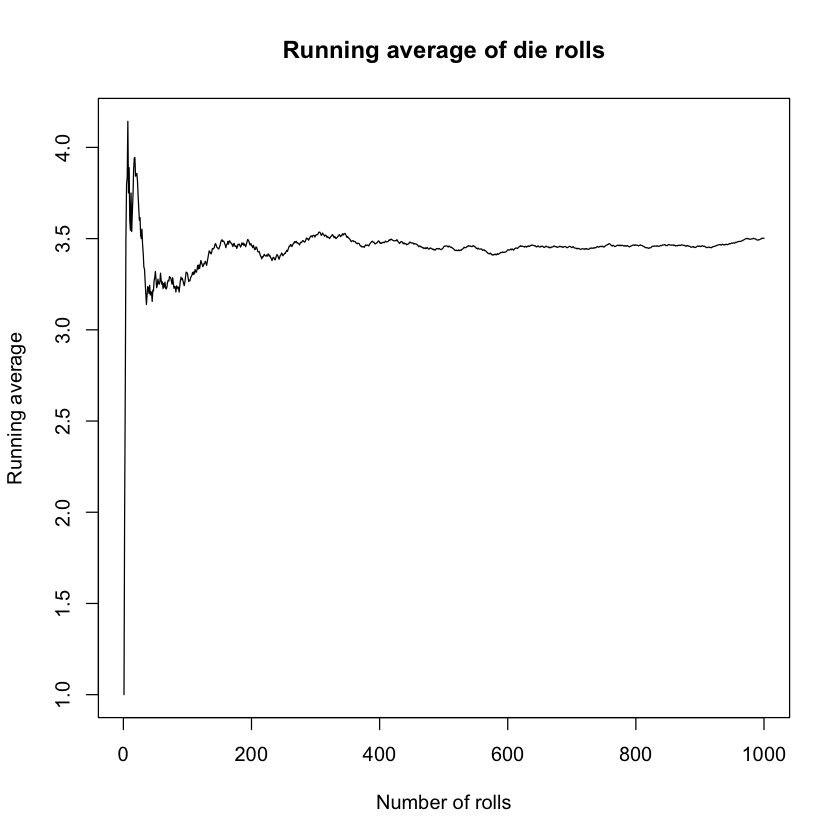

In [10]:
# Generate 1000 die values with d=6
n <- 1000
d <- 6
die_rolls <- sample(1:d, n, replace=TRUE)

# Calculate the running average
running_average <- cumsum(die_rolls) / seq_along(die_rolls)

# Plot the running average
plot(running_average, type="l", xlab="Number of rolls", ylab="Running average", main="Running average of die rolls")


We notice that the running average of the die rolls appears to converge to the expected value of the distribution, which is 3.5. This is consistent with the Central Limit Theorem, which tells us that the sample mean should converge to the population mean as the sample size increases. We also see that the variance of the running average appears to decrease as the sample size increases, which is also consistent with the Central Limit Theorem.